Importing Libraies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/price_pred_amal.csv")

In [ ]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
df.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol
402004,201512149444029,14000.0,14,Silver,Audi,A4 Avant,USED,2014.0,20520,Estate,False,Diesel


In [ ]:
print(df.shape)
df.columns

(402005, 12)


Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [ ]:
df.duplicated().sum()   # looking for duplicate rows

0

In [ ]:
df.isnull().sum()   # looking for null values

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

Data Preprocessing

In [ ]:
df = df.drop(columns=['public_reference'])

In [ ]:
df['crossover_car_and_van'] = df['crossover_car_and_van'].astype(int)     # convert bool type column into Integer

In [ ]:
df['reg_code'] = pd.to_numeric(df['reg_code'], errors='coerce')

In [ ]:
columns_with_missing = ['mileage', 'reg_code', 'standard_colour', 'year_of_registration', 'body_type', 'fuel_type']

In [ ]:
df['mileage'].fillna(df['mileage'].mean(), inplace=True)

imputer = SimpleImputer(strategy='most_frequent')
for col in ['standard_colour', 'body_type', 'fuel_type']:
    df[col] = imputer.fit_transform(df[[col]]).ravel()

df.dropna(subset=['reg_code', 'year_of_registration'], inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
print(df.isnull().sum())

mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


In [ ]:
# find the columns with outliers value
numerical_columns = df.select_dtypes(include=[np.number])

columns_with_outliers = []

for column in numerical_columns.columns:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    threshold = 5

    if any(z_scores > threshold):
        columns_with_outliers.append(column)

print("Columns with outliers:", columns_with_outliers)

Columns with outliers: ['mileage', 'year_of_registration', 'price', 'crossover_car_and_van']


In [ ]:
# removing the outiers

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_with_outliers = ['mileage', 'year_of_registration', 'price', 'crossover_car_and_van']
for column in columns_with_outliers:
    df = remove_outliers_iqr(df, column)

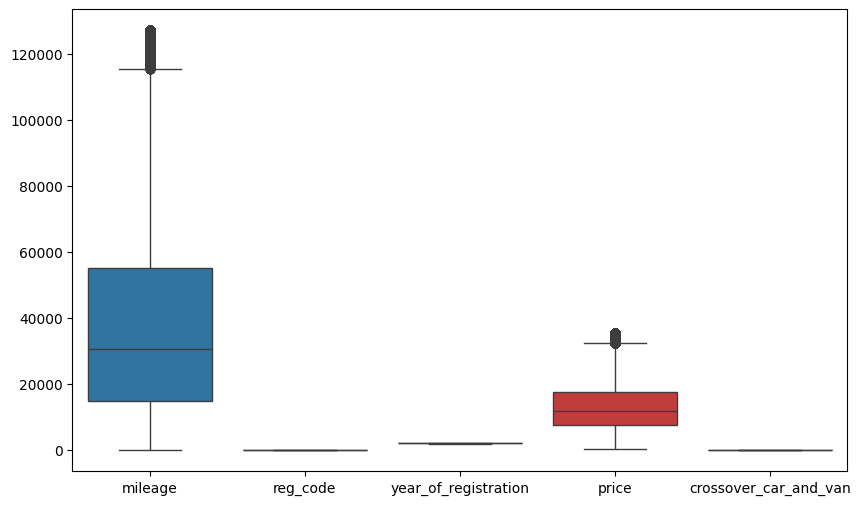

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df, orient='v')
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,319303.0,37536.589383,28721.190156,0.0,14800.0,30651.0,55000.0,127069.0
reg_code,319303.0,40.881555,25.062556,2.0,17.0,58.0,66.0,70.0
year_of_registration,319303.0,2015.738953,2.975103,2008.0,2014.0,2016.0,2018.0,2020.0
price,319303.0,13187.208670,7396.589169,250.0,7551.0,11850.0,17495.0,35526.0
crossover_car_and_van,319303.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


<Axes: >

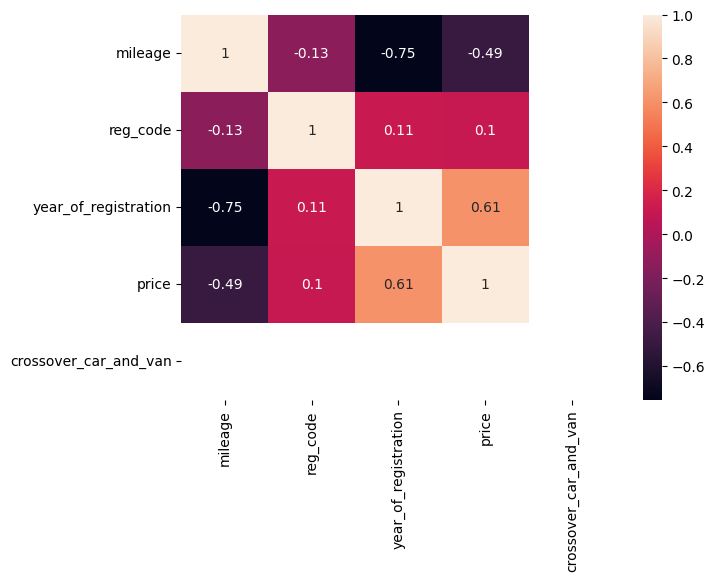

In [ ]:
plt.figure(figsize=(7, 5))

# Select only numerical columns
num_col = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_col.corr(), annot=True, cmap='rocket')

In [ ]:
#Feature Engineering
current_year = 2024
df['car_age'] = current_year - df['year_of_registration']

df['avg_annual_mileage'] = df['mileage'] / df['car_age']

df['mileage_squared'] = df['mileage'] ** 2
df['year_of_registration_squared'] = df['year_of_registration'] ** 2

df['mileage_year_interaction'] = df['mileage'] * df['year_of_registration']

In [ ]:
df.head(3)

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,avg_annual_mileage,mileage_squared,year_of_registration_squared,mileage_year_interaction
0,108230.0,61.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,0,Diesel,13.0,8325.384615,1.171373e+10,4044121.0,217650530.0
1,7800.0,17.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,0,Petrol,7.0,1114.285714,6.084000e+07,4068289.0,15732600.0
2,45000.0,16.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,0,Diesel,8.0,5625.000000,2.025000e+09,4064256.0,90720000.0


In [ ]:
df_1 = df.copy()    # copy the dataset in a new variable

In [ ]:
X_categorical = df_1[['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']]
X_numerical = df_1.drop(['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type', 'price'], axis=1)

In [ ]:
X_categorical = pd.get_dummies(X_categorical)     # perform One-hot encoding for categoricla values

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_numerical)
X_scaled = scaler.transform(X_numerical)
X_scaled = pd.DataFrame(X_scaled, index=X_numerical.index, columns= X_numerical.columns)
X = pd.concat([X_scaled, X_categorical], axis=1)
y = df_1['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
# feature selection
from sklearn.feature_selection import SelectFromModel

# SelectFromModel with RandomForestRegressor as base estimator
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Boosted Tree': GradientBoostingRegressor(random_state=42)
}

Model: Linear Regression
Mean Squared Error (CV): 11068165.304794028
Mean Squared Error: 11148383.919295076
Mean Absolute Error: 2466.794168945776
R^2 Score: 0.7964619386427021


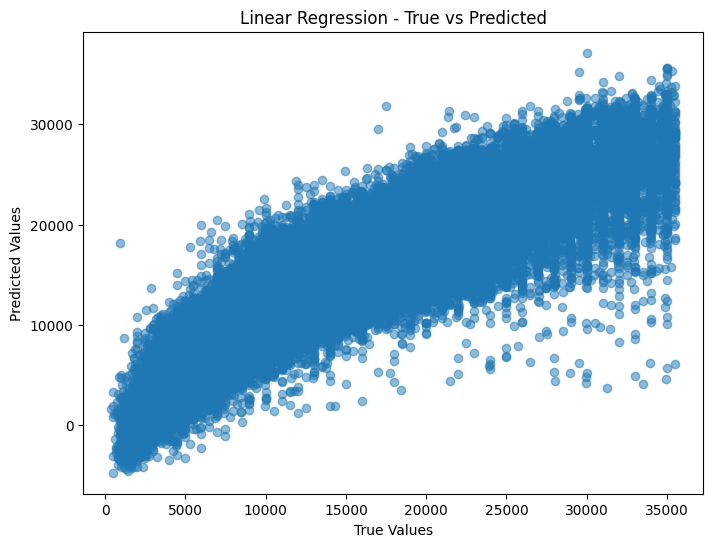

Model: Random Forest
Mean Squared Error (CV): 8225631.744996664
Mean Squared Error: 8190708.966714949
Mean Absolute Error: 1940.9309634430992
R^2 Score: 0.8504607451361963


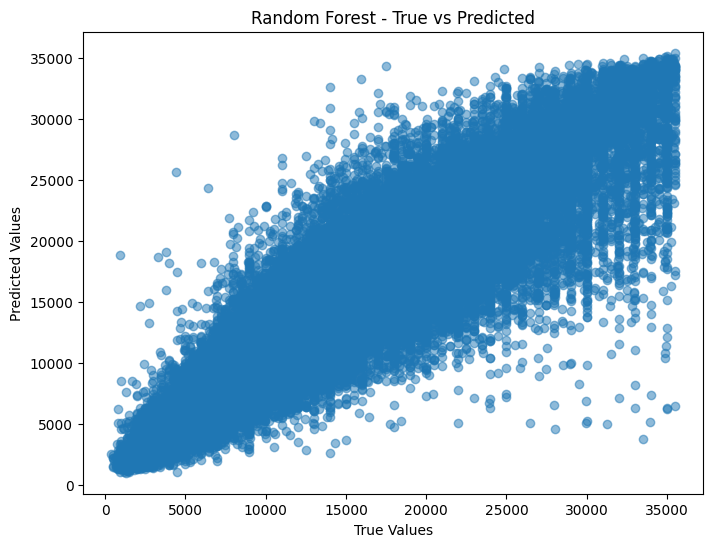

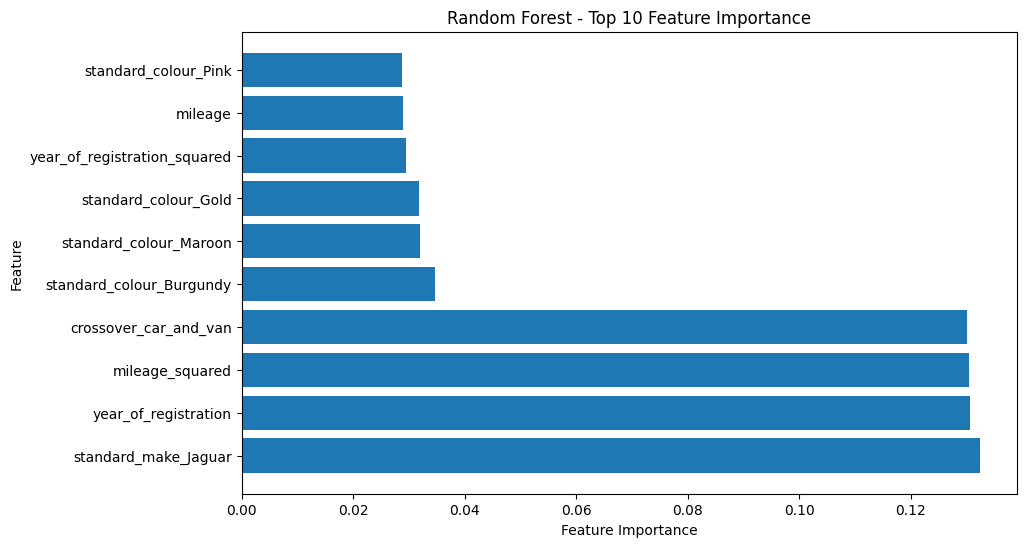

Model: Boosted Tree
Mean Squared Error (CV): 11233561.48226257
Mean Squared Error: 11277794.101930726
Mean Absolute Error: 2407.770944681983
R^2 Score: 0.7940992735349849


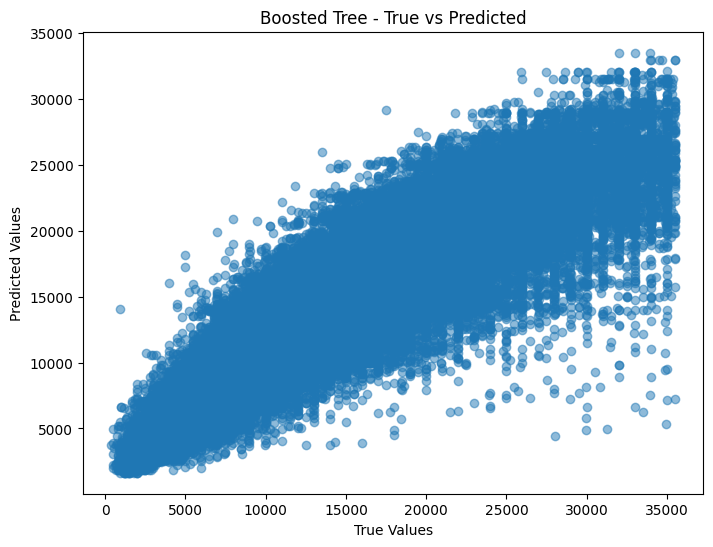

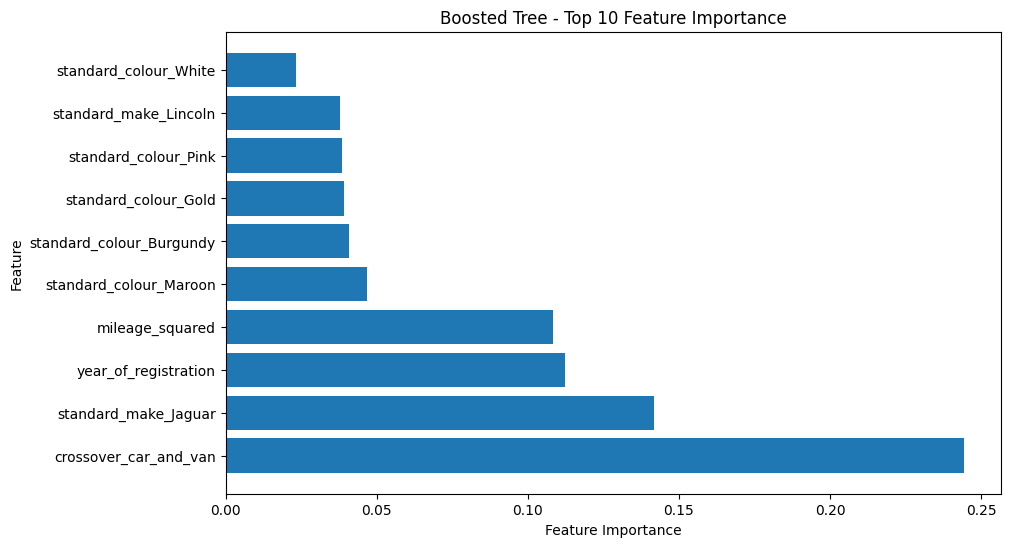

In [ ]:
for name, model in models.items():
    # hyperparameter tuning using GridSearchCV
    if name == 'Linear Regression':
        params = {}
        best_model = model
    else:
        param_grid = {}  # define parameter grid here

        # GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train_selected, y_train)
        best_model = grid_search.best_estimator_

    # model using cross-validation
    cv_scores = cross_val_score(best_model, X_train_selected, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_mean = -cv_scores.mean()

    # fit the best model to the training data
    best_model.fit(X_train_selected, y_train)

    # predictions on the testing data
    y_pred = best_model.predict(X_test_selected)

    # evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # evaluation metrics
    print(f"Model: {name}")
    print(f"Mean Squared Error (CV): {mse_mean}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R^2 Score: {r2}")

    # true vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} - True vs Predicted")
    plt.show()

    # feature importance for tree-based models
    original_columns = X_train.columns
    if name in ['Random Forest', 'Boosted Tree']:
        feature_importance = best_model.feature_importances_
        sorted_idx = np.argsort(feature_importance)[::-1]
        top_features = original_columns[sorted_idx][:10]  # Use original column names
        plt.figure(figsize=(10, 6))
        plt.barh(top_features, feature_importance[sorted_idx][:10])
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature")
        plt.title(f"{name} - Top 10 Feature Importance")
        plt.show()

In [ ]:
# training accuracy
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_train_pred = model.predict(X_train_selected)
    r2_train = r2_score(y_train, y_train_pred)

    print(f"Model: {name}")
    print(f"Training R^2 Score: {r2_train}")


Model: Linear Regression
Training R^2 Score: 0.7977610664960496
Model: Random Forest
Training R^2 Score: 0.9762069788267084
Model: Boosted Tree
Training R^2 Score: 0.7950286490623426


Voting Ensemble Model:
Mean Squared Error: 8197693.493463759
Mean Absolute Error: 2012.8673032528209
R^2 Score: 0.8503332273682183


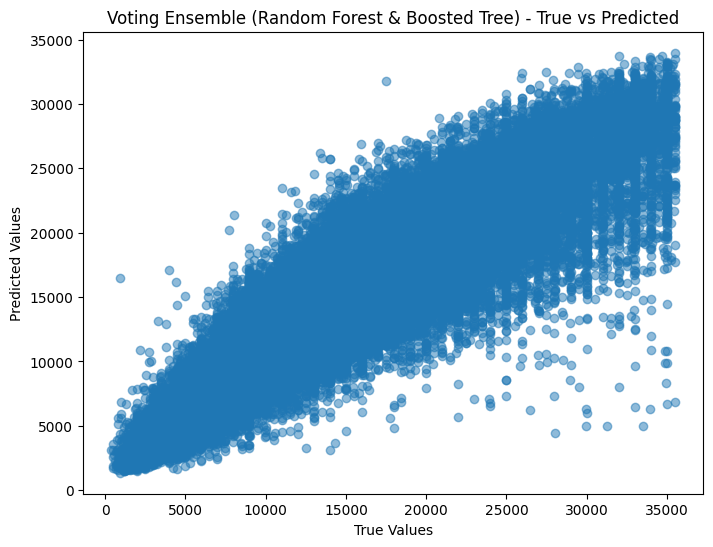

In [ ]:
# ensemble
from sklearn.ensemble import VotingRegressor

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Boosted Tree': GradientBoostingRegressor(random_state=42)
}

# convert the models dictionary to a list of tuples
model_list = list(models.items())

voting_regressor = VotingRegressor(estimators=model_list)

# fit the VotingRegressor to the training data
voting_regressor.fit(X_train_selected, y_train)

# predictions on the testing data
y_pred_voting = voting_regressor.predict(X_test_selected)

# evaluation metrics
mse_voting = mean_squared_error(y_test, y_pred_voting)
mae_voting = mean_absolute_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print("Voting Ensemble Model:")
print(f"Mean Squared Error: {mse_voting}")
print(f"Mean Absolute Error: {mae_voting}")
print(f"R^2 Score: {r2_voting}")

# True vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_voting, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Voting Ensemble (Random Forest & Boosted Tree) - True vs Predicted")
plt.show()


In [ ]:
pip install shap

100%|===================| 238748/239477 [04:24<00:00]       

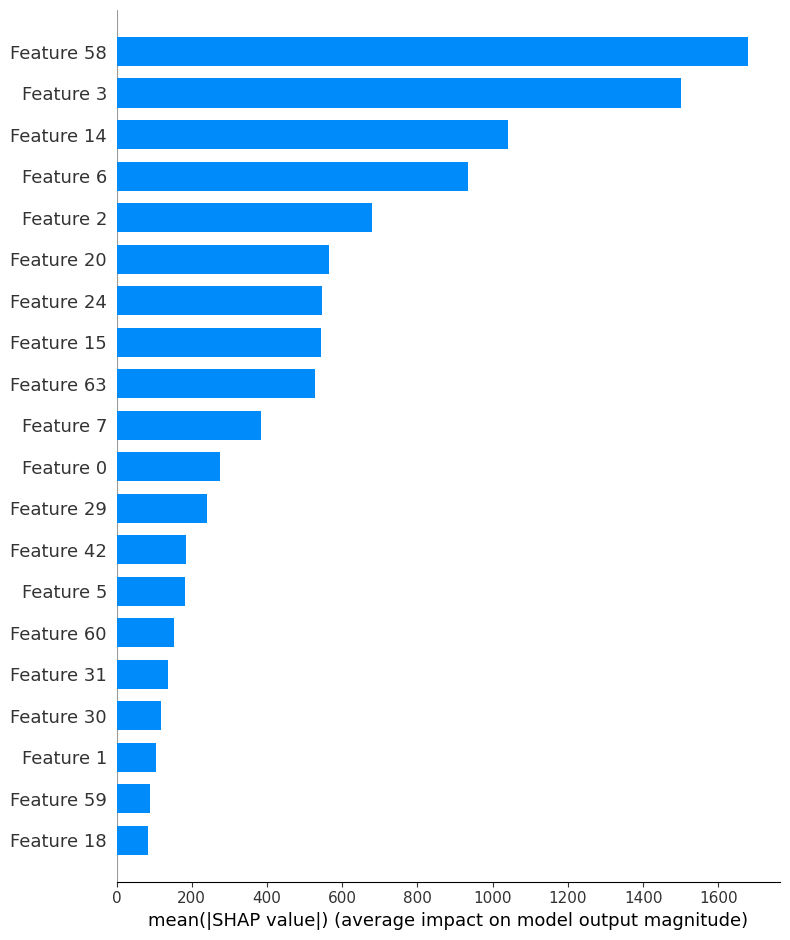

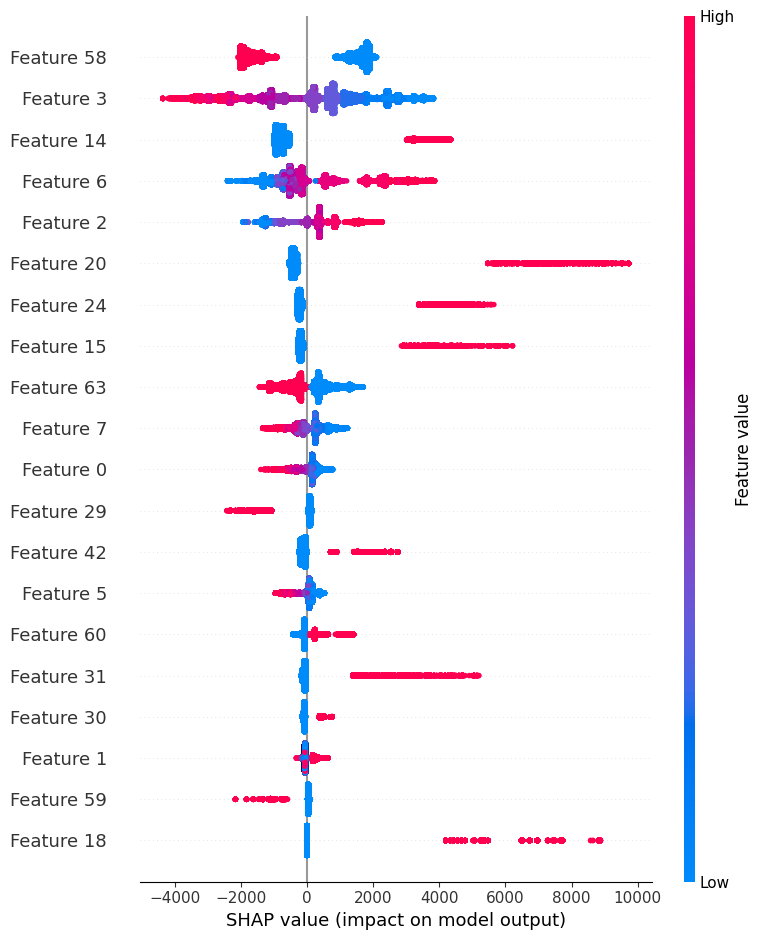

In [ ]:
import shap

# the SHAP explainer for the RF model
explainer_rf = shap.Explainer(best_model, X_train_selected)

# compute SHAP values for the entire dataset
shap_values_rf = explainer_rf.shap_values(X_train_selected)

# visualize global explanations using summary plots
shap.summary_plot(shap_values_rf, X_train_selected, plot_type="bar")
shap.summary_plot(shap_values_rf, X_train_selected)

# visualize local explanations using force plots for a specific instance
index = 5
shap.force_plot(explainer_rf.expected_value, shap_values_rf[index], pd.DataFrame(X_train_selected).iloc[index, :])


100%|===================| 239215/239477 [03:59<00:00]       

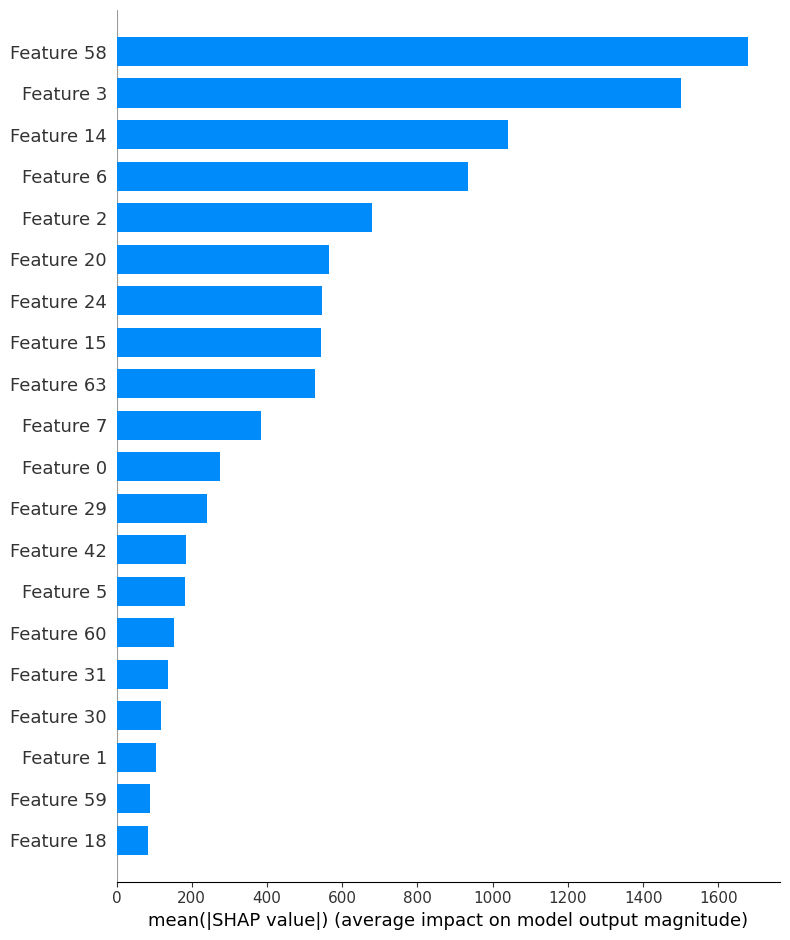

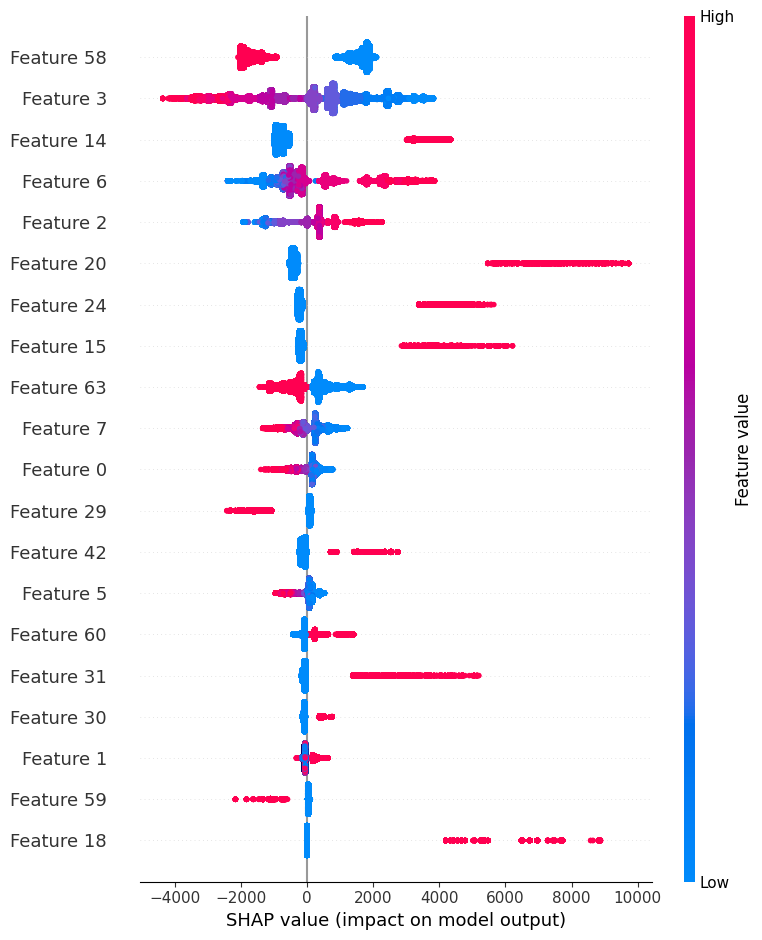

In [ ]:
# Create a SHAP explainer for the Gradient Boosting model
explainer_gb = shap.Explainer(best_model, X_train_selected)

# Compute SHAP values for the entire dataset
shap_values_gb = explainer_gb.shap_values(X_train_selected)

# Visualize global explanations using summary plots
shap.summary_plot(shap_values_gb, X_train_selected, plot_type="bar")
shap.summary_plot(shap_values_gb, X_train_selected)

# Visualize local explanations using force plots for a specific instance
index = 5
shap.force_plot(explainer_gb.expected_value, shap_values_gb[index], pd.DataFrame(X_train_selected).iloc[index, :])

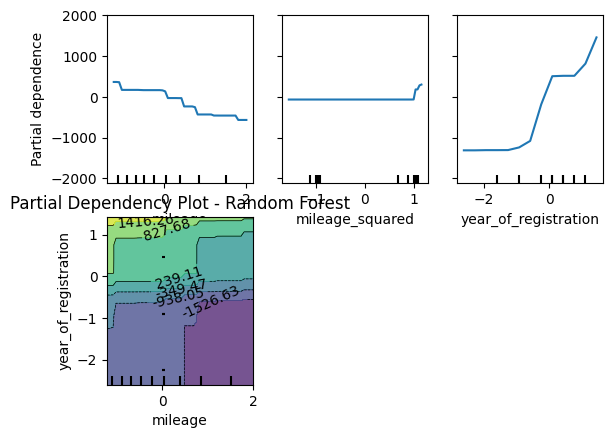

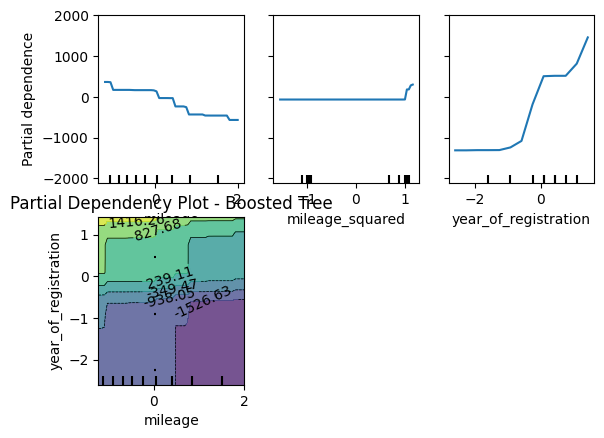

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

feature_names = ['mileage', 'mileage_squared', 'year_of_registration', ('mileage', 'year_of_registration')]

# Plot partial dependency for each model
for name, model in models.items():
    if name == 'Linear Regression':  # Skip Linear Regression model as partial dependence is not applicable
        continue

    # Plot partial dependency for the current model
    PartialDependenceDisplay.from_estimator(best_model, X=X_train_selected, features=feature_names,
                            feature_names=feature_names, grid_resolution=50)
    plt.title(f'Partial Dependency Plot - {name}')
    plt.show()

<Figure size 2500x2100 with 0 Axes>

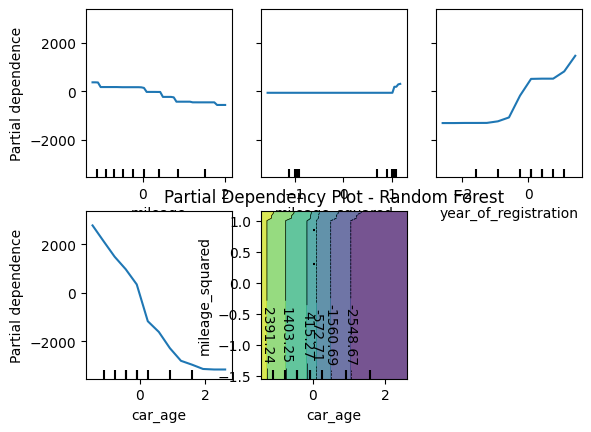

<Figure size 2500x2100 with 0 Axes>

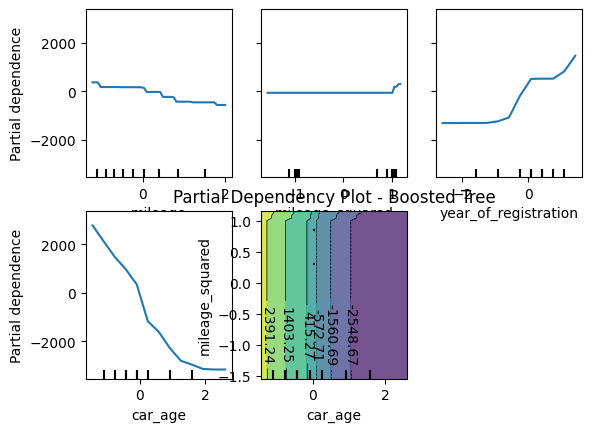

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

feature_names = ['mileage', 'mileage_squared', 'year_of_registration', 'car_age', ('car_age', 'mileage_squared')]

# Plot partial dependency for each model
for name, model in models.items():
    if name == 'Linear Regression':  # Skip Linear Regression model
        continue

    # Plot partial dependency for the current model
    plt.figure(figsize=(25, 21))
    des = PartialDependenceDisplay.from_estimator(best_model, X=X_train_selected, features=feature_names,
                            feature_names=feature_names, grid_resolution=50)
    plt.title(f'Partial Dependency Plot - {name}')
    plt.show()